In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('diabetes_india.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Visualization

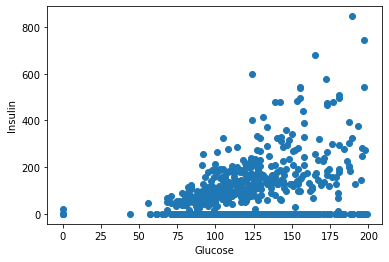

In [36]:
plt.scatter(data['Glucose'], data['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

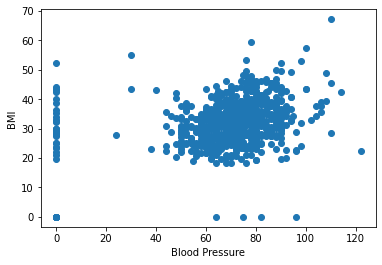

In [18]:
plt.scatter(data['BloodPressure'], data['BMI'])
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

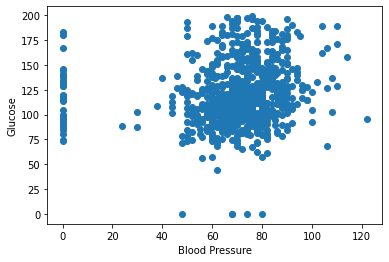

In [37]:
plt.scatter(data['BloodPressure'], data['Glucose'])
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose')
plt.show()

### K Means Clustering

In [40]:
data_1 = data.loc[:,['Glucose','Insulin']]

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data_1)
labels1 = kmeans1.predict(data_1)

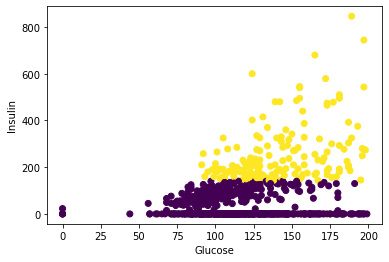

In [43]:
plt.scatter(data['Glucose'], data['Insulin'],c=labels1)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

In [44]:
data2 = data.loc[:, ['Glucose', 'BloodPressure']]
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

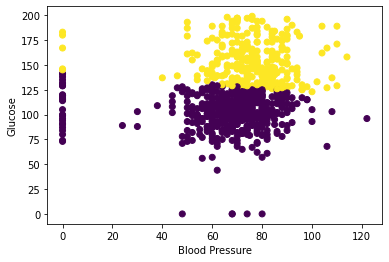

In [45]:
plt.scatter(data['BloodPressure'], data['Glucose'],c=labels2)
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose')
plt.show()

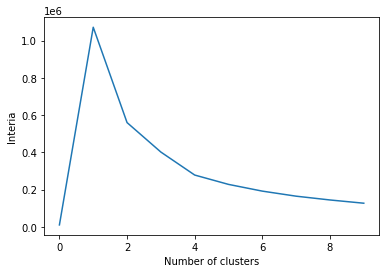

In [49]:
### Finding optimum number of clusters

list_iner = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    list_iner[i] = kmeans2.inertia_
    
plt.plot(range(0,10),list_iner,'-')
plt.xlabel("Number of clusters")
plt.ylabel("Interia")
plt.show()

In [50]:
data_3 = data.drop('Outcome',axis=1)
data_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sscaler = StandardScaler()
kmeans_model = KMeans(n_clusters=4)
pipeline = make_pipeline(sscaler, kmeans_model)
pipeline.fit(data_3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [52]:
labels = pipeline.predict(data_3)
df = pd.DataFrame({'labels':labels, 'Outcome':data['Outcome']})
matrix = pd.crosstab(df['labels'],df['Outcome'])
matrix

Outcome,0,1
labels,,
0,89,106
1,20,16
2,284,41
3,107,105
